In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The dataset used for this multi-class text classification is the cuisine dataset stored in a CSV file. Cuisine is a certain kind of cooking style or food from a certain region or country. A food that is considered to be "Italian food" is an example of Italian cuisine. There are many types of cuisines worldwide like Indian, Italian, French, Greek, etc.

The dataset consists of various cuisine descriptions related to various cuisines. All the cuisine descriptions are labelled to a specific cuisine. So this is a supervised classification problem containing cuisine descriptions as feature or input and respective cuisine as target variable or output. 

The objective is to classify or predict the cuisine descriptions into predefined categories using suitable classification algorithms. 

**Step 1: Loading and Reading the data**

The cuisine dataset is stored in a CSV file so load the file into the local directory using the Pandas library and after loading the dataset into the working directory visualize the first five rows of the dataset.

The cuisine dataset contains 2 columns i.e cuisine_description  and cuisine.

In [2]:
#Reading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/cuisine_data.csv")
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


**Step 2: Data preprocessing**

After loading the cuisine dataset, visualize the shape of the dataset to understand the number of rows and columns present in the dataset. The given dataset consists of 39774 rows and 2 columns.

In [3]:
df.shape

(39774, 2)

Now identify the number of classes in the target variable present in the dataset in order to classify this as a binary-text classification problem or multi-class text classification problem and also identify the distribution of the data into different classes present in the dataset.

The target variable of the given cuisine dataset consists of 20 different classes like 'greek', 'southern_us', 'filipino', 'indian' etc. So based on the target variable this is a multi-class text classification problem.

The distribution of the dataset along different classes is visualized by using value_counts.

In [4]:
#Multiple classes
df["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

printing the count for each of these unqie cuisine values

In [5]:
#Printing value counts for each classes
df["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

After understanding the class and its distribution, check for null values and NaN values present in the dataset and treat them if any because these could potentially affect the accuracy of the model.

In [6]:
#Checking for NA values
df.isna().sum()

cuisine_description    0
cuisine                0
dtype: int64

In [7]:
# Checking for NULL values
df.isnull().sum()

cuisine_description    0
cuisine                0
dtype: int64

Based on the visualization the cuisine dataset does not contain any null values and NaN values which could potentially make the model impure. 

After visualizing the number of null and NaN values present in the dataset, now check for the number of duplicate values present in the dataset which could also potentially make the data impure and reduce the accuracy.

In [8]:
#Checking for duplicate values
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 97
Shape of Data: (39774, 2)


From the observation, the dataset consists of 97 duplicated values. So all the duplicate values should be treated i.e all the 97 duplicated values should be dropped from the dataset to make the data clean.

In [9]:
#Removing duplicate values
df.drop_duplicates(inplace = True)
print("Total Number of duplicated:",df.duplicated().sum())
print("Shape of Data:",df.shape)

Total Number of duplicated: 0
Shape of Data: (39677, 2)


All the duplicate values present in the dataset are dropped and the shape of the data has changed from (39774,2) to (39677,2) which clearly indicates that all the 97 duplicated values are removed from the dataset.

After treating the null and NaN values followed by removing duplicate values the data is clean and ready to be analyzed and solve business problems. But before using the text data for analysis or prediction, processing of the data is required.

The text data cannot be directly used for the model building, so we perform text preprocessing and vectorization. The text preprocessing consists of a few steps :

**1.Removing punctuations
2.Lower casing
3.Removing stopwords**
We will use the following steps of text preprocessing for the cuisine dataset to preprocess the text data.

In [10]:
def preprocessing(x):
 x=re.sub('[^a-zA-Z ]', ' ', x) #Removing non-alphabetic character
 x=x.lower() #Converting the text to lower case
 x=x.split() #Splitting the text reviews into list
 x=[word for word in x if word not in set(stopwords.words('english'))] #Removing Stopwords 
 x=" ".join(x) #Converting list to string
 return x

importing some needed libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using apply operation we are preprocessing each and every row of the input variable of the cuisine dataset and visualizing the first five rows of the preprocessed data.

In [12]:
import re
#Applying preprocessing to each rows
df["cuisine_description"] = df["cuisine_description"].apply(preprocessing)
#Preprocessed Data
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


Now all the text data present in the input variable of the cuisine dataset is preprocessed. So with text preprocessing, we perform vectorization before feeding the data to the classification algorithm.

**Step 3: Vectorization using TF IDF**

The text data after preprocessing needs to be vectorized before feeding it to the classification algorithm. In vectorization, we convert the textual form of the data to numeric or vectors using various vectorizers like countvectorizer, TF-IDF, Word2Vec, etc. In this vectorization process for the cuisine dataset, we use TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data to vectors and determine the importance of each word in the set of words. So we are vectorizing and defining the input feature of the dataset.

In [13]:
tv = TfidfVectorizer()
X = tv.fit_transform(df["cuisine_description"].values)
X = pd.DataFrame(X.todense(),columns=tv.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


first 5 rows ftw

In [14]:
X.head()

,abalone,abbamele,absinthe,abura,acai,accent,accompaniment,achiote,acid,acini,...,yuzukosho,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now observe the number of columns in the input feature. A single feature is converted into 2978 input features containing all the unique words with their respective importance or weightage for each text and all the textual form of the data is converted into vectors. 

Now the vectorized dataset is all set to be fed into the classification algorithm to make respective predictions. 

**Step 4: Train test split**

First, we will define the input and output features from the dataset in order to split the data into train and test datasets. The vectorized textual data(X) is considered to be the input feature and the other column i.e cuisine column in the input dataset is considered to be the output feature(Y).

In [15]:
#Target Variable
y = df.cuisine

Now we will split the X, and Y features into train and test datasets using scikit learn’s train_test_split method. The dataset is split into training and testing datasets separately as X_train, y_train, X_test, and y_test. We will 30% of the data for testing the data and the remaining 70% of the data for training the model. 

In [16]:
#Creating training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

The shape of the training and testing datasets are printed to get inference about the data distribution. After the observation, the training dataset is distributed with 27773 rows and the test dataset is distributed with 11904 rows based on the test_size provided during the splitting.

In [17]:
#Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27773, 2978)
(27773,)
(11904, 2978)
(11904,)


Step 5: Building a Text-classification model

Now we’re going to build the best classification model which can achieve good performance in high-dimensional data because the dimension of the data is very high i.e (27773, 2978) for X_train data and (11904,2978) for X_test data.

Based on the various classification algorithms, Tree-based methods can potentially adapt to handle high-dimensional data with good accuracy. So in order to tackle the problem of high-dimensionality of the data we are introducing one of the ensemble models of the decision tree i.e Random Forest Classifier. Random Forest is one of the best-supervised machine learning methods which can achieve good performance in high-dimensional data.
Classification
We are importing xgboost from sklearn and initializing the xgboost
model.  

In [18]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
#Defining the random forest classification model
model =RandomForestClassifier()
#Training the model
model = model.fit(X_train,y_train)

making predictions

In [20]:
#Prediction of the text data
y_pred = model.predict(X_test)

The results of the predictions of the test data are saved as y_pred. Now with the help of the prediction values and actual values, we will evaluate the performance of the model using various evaluation methods.

**Step 6: Model Evaluation and obtaining prediction** 

Now we will evaluate the accuracy of the model using various evaluation metrics. 

First, we will obtain the accuracy score between the actual value (y_test) and the predicted value (y_pred). 

In [21]:
#Computing Accuracy Score
print("Accuracy Score:",accuracy_score(y_pred,y_test))

Accuracy Score: 0.7452116935483871


Based on the accuracy score obtained, the random forest classification model performs prediction with an accuracy of 74.655%. 

The second evaluation metric which we are using is the Classification Report. The classification report is used to analyze the precision, recall, F1 Score, and support of the trained classification model.

In [22]:
#Printing Classification Report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   brazilian       0.41      0.88      0.56        68
     british       0.22      0.67      0.33        78
cajun_creole       0.67      0.78      0.72       374
     chinese       0.87      0.74      0.80       945
    filipino       0.51      0.81      0.63       140
      french       0.53      0.58      0.55       709
       greek       0.54      0.86      0.67       218
      indian       0.93      0.78      0.85      1059
       irish       0.29      0.68      0.41        82
     italian       0.92      0.69      0.79      3176
    jamaican       0.50      0.92      0.65        85
    japanese       0.62      0.84      0.72       317
      korean       0.69      0.93      0.79       175
     mexican       0.93      0.84      0.88      2136
    moroccan       0.56      0.83      0.67       162
     russian       0.24      0.85      0.37        39
 southern_us       0.75      0.66      0.70      1473
     spanish       0.23    

Based on the classification report twelve classes out of twenty classes are showing good performance in all the three evaluation metrics(precision, recall, and f1 score) and obtaining an average f1 score of 75%. 

The third evaluation metric which we are using is the confusion matrix. The confusion matrix allows us to visualize the performance of the classification machine learning model. The performance of the random forest classification model is evaluated using a confusion matrix and visualized. 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


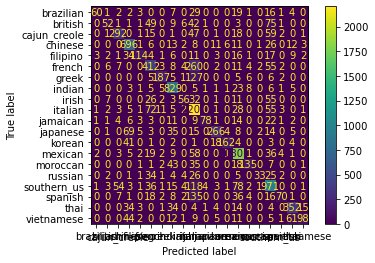

In [23]:
# Plotting confusion matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

Now we will try to randomly predict the cuisine classes on new data or a new cuisine description.  So we are defining a function which at the first step will convert the input string into a NumPy array so that the data can be vectorized. The second step is converting the text value into vectors with respective weightage. After vectorization, we are calling the model to predict the class of the new data. 

In [24]:
def prediction(a):
 a = np.array([a])
 #Vectorization using TF-IDF
 a = tv.transform(a)
 #PREDICTED VALUE
 x = model.predict(a)
 return x

**Test case 1**: Consider a new cuisine description, and use the constructed model to predict the cuisine for the respected cuisine description. After the prediction, the model has predicted the cuisine "indian" for the respected cuisine description. 

In [25]:
a ="olive oil sea salt coconut milk water garam masala ground coriander basmati rice cauliflower fresh ginger green chilies onions fresh cilantro potatoes scallions cumin"
prediction(a)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['indian'], dtype=object)

**Test case 2**: Consider a new cuisine description, and use the constructed model to predict the cuisine for the respected cuisine description. After the prediction, the model has predicted the cuisine "italian" for the respected cuisine description. 

In [26]:
a ="tomato sauce shredded carrots spinach part skim mozzarella cheese italian seasoning english muffins split toasted chopped onion vegetable oil cooking spray chopped green bell pepper"
prediction(a)

array(['italian'], dtype=object)

AAAAAND THATS A WRAP